# Gradient Boosting Machines (GBM)

Gradient boosting machines is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt

### Load the data from CSV file

In [2]:
cust = pd.read_csv('data/telco_customer_churn.csv')

In [3]:
display(HTML(cust.head().to_html()))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the Column Types

In [4]:
cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Convert String labels to Numeric

In [5]:
cust['Churn'] = np.where(cust['Churn']=='Yes',1,0)

### Select features to Train the model

In [6]:
cust = cust[['gender','MonthlyCharges','tenure','Churn']]

### Split the data set into Train and Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cust.drop(columns = ['Churn'], axis=1), cust['Churn'], test_size=0.2, random_state=2018, shuffle=True)

### Encode the categorical variables

In [8]:
print(X_train.shape)
print(X_test.shape)

(5634, 3)
(1409, 3)


In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)

(5634, 4)
(1409, 4)


In [11]:
display(HTML(X_train.head().to_html()))

,MonthlyCharges,tenure,gender_Female,gender_Male
3569,19.95,17,0,1
5900,40.20,37,0,1
1056,80.00,5,1,0
4417,70.45,1,0,1
4756,72.45,31,0,1


### Train Gradient Boosting Machines (GBM) Classifier

In [12]:
gbm = GradientBoostingClassifier(max_depth=4, random_state=2018, n_estimators=100, verbose=1)
gbm = gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0970            0.50s
         2           1.0591            0.44s
         3           1.0286            0.42s
         4           1.0035            0.41s
         5           0.9826            0.42s
         6           0.9649            0.42s
         7           0.9491            0.47s
         8           0.9358            0.46s
         9           0.9244            0.47s
        10           0.9147            0.46s
        20           0.8606            0.32s
        30           0.8393            0.25s
        40           0.8264            0.19s
        50           0.8145            0.15s
        60           0.8059            0.11s
        70           0.7967            0.08s
        80           0.7896            0.06s
        90           0.7829            0.03s
       100           0.7760            0.00s


In [13]:
gbm

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=2018, subsample=1.0, verbose=1,
              warm_start=False)

### Display Relative Feature Importance

In [14]:
gbm.feature_importances_

array([ 0.60847262,  0.36218953,  0.01250456,  0.01683329])

In [15]:
importances = gbm.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

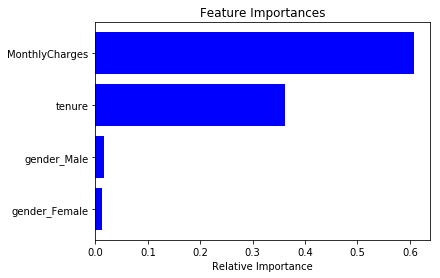

In [16]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Predict on the Test dataset using the Trained model

In [17]:
pred_test = gbm.predict(X_test)
pred_test_prob = gbm.predict_proba(X_test)

### Evaluate the model performance

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

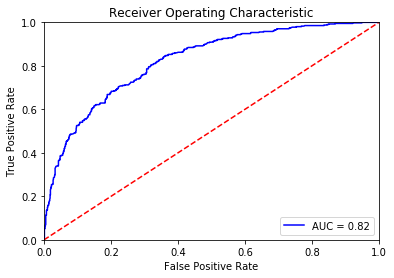

In [19]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Area Under the Curve (AUC)

In [20]:
metrics.roc_auc_score(y_test, pred_test_prob[:,1])

0.82351635794749567

#### Overall Accuracy

In [21]:
metrics.accuracy_score(y_test, pred_test)

0.79559971611071678